# Implementation of K-Means Clustering

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Generate random data
np.random.seed(42)
cluster_1 = np.random.randn(100, 2) + np.array([2, 2])
cluster_2 = np.random.randn(100, 2) + np.array([7, 7])
data = np.vstack([cluster_1, cluster_2])

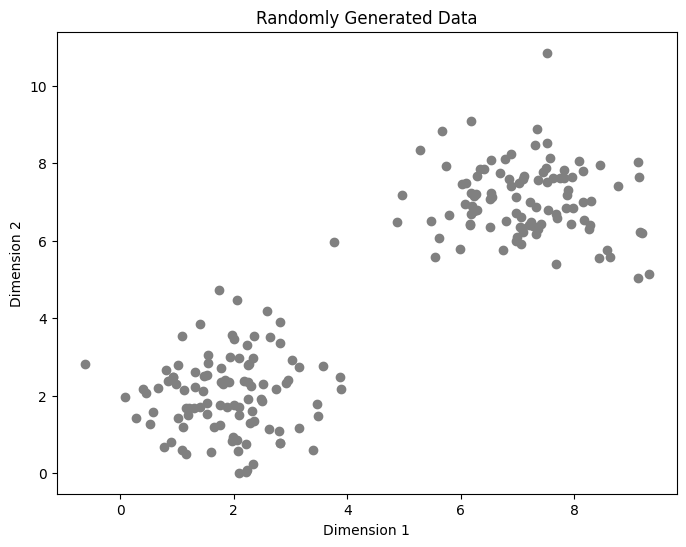

In [ ]:
# Step 1a: Visualize the randomly generated data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='gray', marker='o', label='Data points')
plt.title('Randomly Generated Data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [ ]:
# Step 2: K-Means Algorithm Implementation
def k_means(data, k, max_iterations=100, tol=1e-4):
    """
    K-Means clustering algorithm.

    Parameters:
    data: ndarray, shape (n_samples, n_features)
        The dataset to cluster.
    k: int
        Number of clusters.
    max_iterations: int
        Maximum number of iterations.
    tol: float
        Tolerance for centroid movement.

    Returns:
    centroids: ndarray, shape (k, n_features)
        Final centroid positions.
    labels: ndarray, shape (n_samples,)
        Cluster labels for each point.
    distortions: list
        Distortion (inertia) values for each iteration.
    """
    n_samples, n_features = data.shape
    # Step 2.1: Initialize centroids randomly
    centroids = data[np.random.choice(n_samples, k, replace=False)]
    distortions = []


    for iteration in range(max_iterations):
        # Step 2.2: Cluster Assignment Step
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 2.3: Compute distortion (inertia)
        distortion = np.sum(np.min(distances, axis=1)**2)
        distortions.append(distortion)


        # Step 2.4: Update Centroids
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Step 2.5: Check for convergence
        #print(np.linalg.norm(new_centroids - centroids))
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids

    return centroids, labels, distortions


In [ ]:
# Step 3: Run the K-Means Algorithm
k = 2  # Number of clusters
centroids, labels, distortions = k_means(data, k)

In [ ]:
    print("centroids")
    print(centroids.shape)
    print(centroids)

    print("labels")
    print(labels.shape)
    print(labels)

    print("distortions")
    print(np.shape(distortions))
    print(distortions)

centroids
(2, 2)
[[1.88443575 2.03402232]
 [7.12824872 7.04348765]]
labels
(200,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
distortions
(4,)
[5365.1034103252905, 2647.1164574325107, 486.77249905355916, 364.86998857772966]


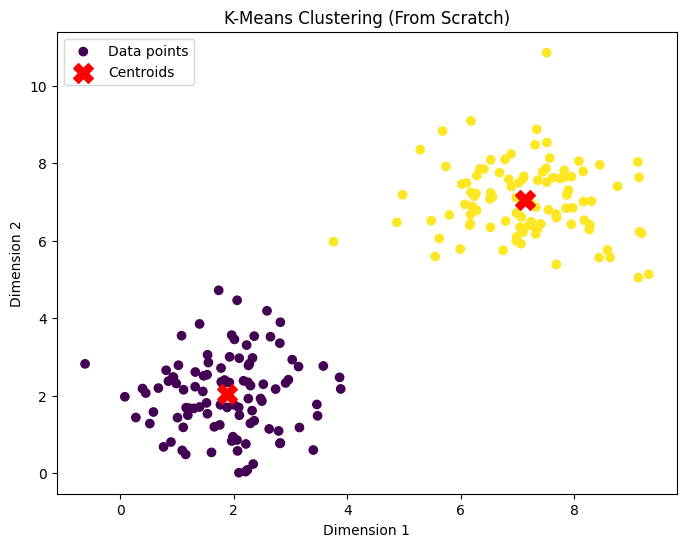

In [ ]:
# Step 4: Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data points')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering (From Scratch)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [ ]:
# Step 5: Plot Distortion Over Iterations
plt.figure(figsize=(8, 6))
plt.plot(distortions, marker='o')
plt.title('Distortion Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Distortion')
plt.grid()
plt.show()

In [ ]:
np.linalg.norm(2647.1164574325107 - 486.77249905355916) #2647.1164574325107